# BG Eraser


## using rembg

In [ ]:
pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install opencv-contrib-python

In [ ]:
from rembg import remove
from PIL import Image
import io

input_path = '/content/p1.jpg'
output_path = 'p1_nobg.png'

with open(input_path, 'rb') as i:
    input_data = i.read()
    output_data = remove(input_data)

with open(output_path, 'wb') as o:
    o.write(output_data)

print("Background removed successfully!")


Background removed successfully!


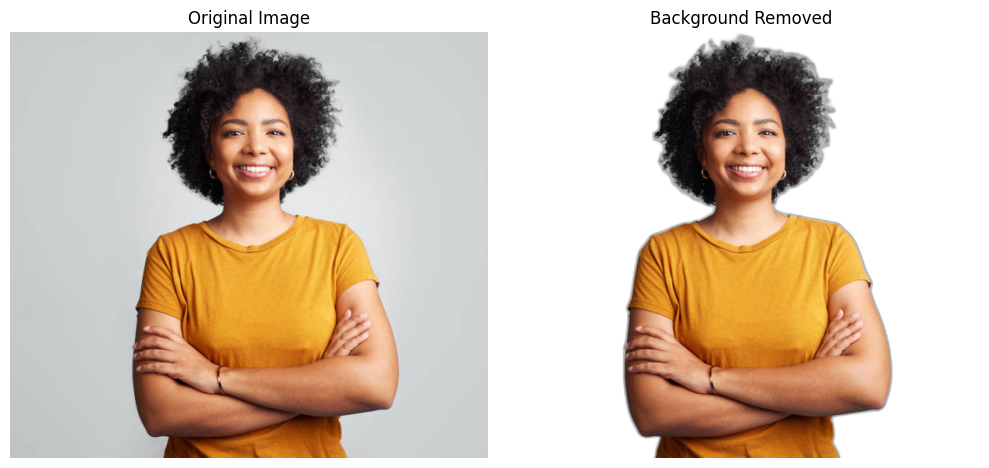

In [ ]:
# Load images for display
original = Image.open(input_path).convert("RGB")
removed_bg = Image.open(io.BytesIO(output_data)).convert("RGBA")

# Show side-by-side using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(removed_bg)
plt.title('Background Removed')
plt.axis('off')

plt.tight_layout()
plt.show()


## SAM

In [ ]:
!pip install segment_anything

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

--2025-06-13 09:54:48--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.183.93, 18.165.183.96, 18.165.183.84, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.183.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b.pth’

sam_vit_b.pth       100%[===================>] 357.67M  25.4MB/s    in 15s     

2025-06-13 09:55:04 (23.9 MB/s) - ‘sam_vit_b.pth’ saved [375042383/375042383]



In [ ]:
import torch
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor
from matplotlib import pyplot as plt
from PIL import Image

# Load image
image_path = "p1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load model
sam_checkpoint = "sam_vit_b.pth"  # download from official repo
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)
predictor.set_image(image)

# Manual bounding box (you can automate using object detection)
input_box = np.array([100, 50, 400, 500])  # [x0, y0, x1, y1]
masks, _, _ = predictor.predict(box=input_box)

# Save mask and composite
mask = masks[0]
foreground = image * mask[:, :, None]
cv2.imwrite("person_mask_sam.png", mask.astype(np.uint8) * 255)
cv2.imwrite("person_nobg_sam.png", cv2.cvtColor(foreground, cv2.COLOR_RGB2BGR))


True

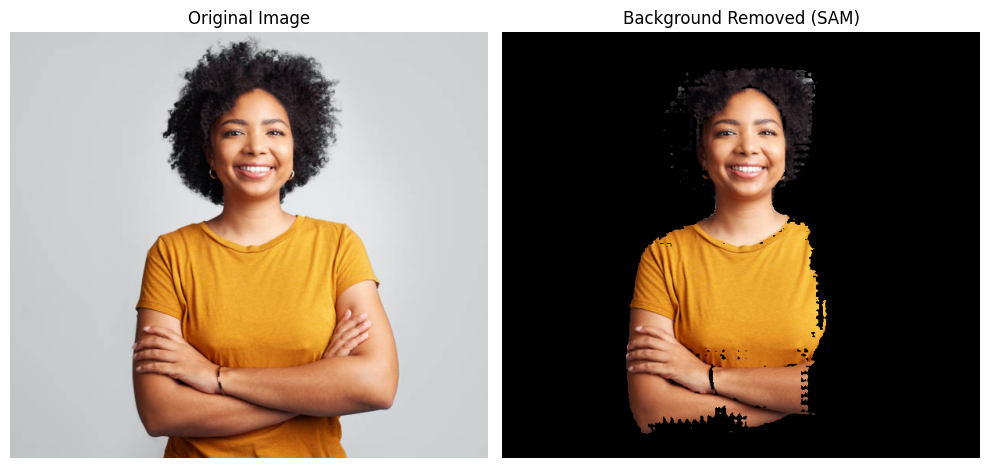

In [ ]:
# Convert to PIL for Matplotlib compatibility
original_image = Image.fromarray(image)
removed_bg_image = Image.fromarray(foreground.astype(np.uint8))

# Display side-by-side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(removed_bg_image)
plt.title("Background Removed (SAM)")
plt.axis('off')

plt.tight_layout()
plt.show()